# Árbol de decisión para especies de flores

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

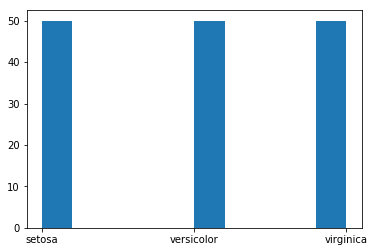

In [23]:
plt.hist(data.Species)

In [24]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [26]:
import numpy as np

In [27]:
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

(array([ 33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 117.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

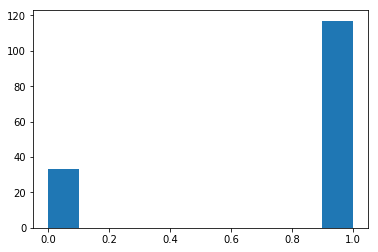

In [28]:
#data["is_train"] = (data["is_train"].astype(np.float32) - data["is_train"].astype(np.float32)).astype(np.bool)
plt.hist(data.is_train)

In [29]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [30]:
test.shape

(33, 6)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [33]:
preds = tree.predict(test[predictors])

In [34]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,10,0,0
versicolor,0,9,0
virginica,0,2,12


## Visualización del árbol de decisión

In [42]:
from sklearn.tree import export_graphviz

In [43]:
with open("../notebooks/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [44]:
import os
from graphviz import Source

ImportError: No module named 'graphviz'

In [45]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

FileNotFoundError: [Errno 2] No such file or directory: 'resources/iris_dtree.dot'

In [46]:
Source(text)

NameError: name 'Source' is not defined

## Cross Validation para la poda

In [ ]:
X = data[predictors]
Y = data[target]

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

In [ ]:
from sklearn.cross_validation import KFold

In [ ]:
cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1)

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

In [ ]:
score = np.mean(scores)
score

In [ ]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

In [ ]:
predictors

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

In [ ]:
forest.oob_decision_function_

In [ ]:
forest.oob_score_